In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt



In [2]:
# 1. Convex hull 
# 2. Try to find a separating line 
# 3. Remove template line? (If canny filter does find a horixontal line)

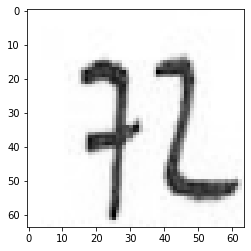

In [12]:
# Load the image and convert to grayscale 
image = cv2.imread('testImages/multiDigitSample4.jpg')

# Grayscale the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert colors, so it's conform with MNIST 
#image = 1 - image

# Resize the image 
image = cv2.resize(image, (64,64))

# Normalize the image
#image = image.astype('float32')
#image /= 255

# Plot the input image 
plt.imshow(image, cmap='gray')



In [13]:
# Find convex hull

edges= cv2.Canny(image, 100,200)
contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#thresh = 200
#cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
#contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    hull= cv2.convexHull(cnt)
    cv2.drawContours(image, [hull],0,(0,255,0),2)
    

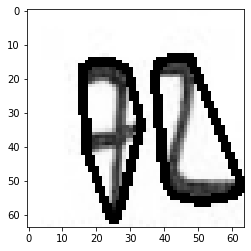

In [14]:


# Plot the input image 
plt.imshow(image, cmap="gray")